<a href="https://colab.research.google.com/github/kebscharry/CharityMomanyi/blob/main/Gestational_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gestational Diabetes**

## **notebooks**

### **Data_Exploration**

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Gestational Diabetes.csv')


In [4]:
df.head()

,Age,Pregnancy No,Weight,Height,BMI,Heredity,Prediction
0,17.0,1.0,48.0,165.0,17.6,0,0
1,17.0,1.0,49.0,145.0,23.3,0,0
2,17.0,1.0,50.0,140.0,25.5,0,0
3,17.0,1.0,50.0,145.0,23.8,0,0
4,17.0,1.0,49.0,146.0,23.0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           1012 non-null   float64
 1   Pregnancy No  1012 non-null   float64
 2   Weight        1012 non-null   float64
 3   Height        1012 non-null   float64
 4   BMI           1012 non-null   float64
 5   Heredity      1012 non-null   int64  
 6   Prediction    1012 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 55.5 KB
None
               Age  Pregnancy No       Weight       Height          BMI  \
count  1012.000000   1012.000000  1012.000000  1012.000000  1012.000000   
mean     30.357708      2.517787    72.988142   158.154150    29.256818   
std       7.022960      1.530656    12.552712     7.367421     5.092321   
min      16.000000      1.000000    43.000000   135.000000    16.000000   
25%      24.000000      1.000000    64.750000   153.000000    25.700000   
5

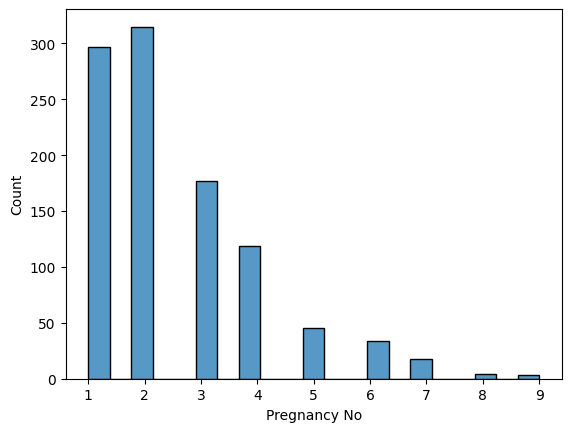

In [3]:
# Basic Data Overview
print(df.info())
print(df.describe())

# Visualization example (e.g., histograms, box plots)
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Pregnancy No'])
plt.show()


### **Data Preprocessing**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Example: Handling missing values
df.fillna(df.mean(), inplace=True)

# Example: Splitting data
X = df.drop('Prediction', axis=1)
y = df['Prediction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### **Model Development**

In [6]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Example: Cross-validation or Grid Search (optional)


RandomForestRegressor(random_state=42)

## **Model Evaluation**

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, R²: {r2}')


MSE: 0.13211920662287904, R²: 0.28830060317356554


## **model deployment**

In [20]:
!pip install Flask




In [21]:
!pip install pyngrok


## **saving the model**

In [10]:
import joblib

# Save the model
joblib.dump(model, 'random_forest_model.pkl')


['random_forest_model.pkl']

### **Create a flask Application**

In [ ]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

app = Flask(__name__)

# Load the saved model
model = joblib.load('random_forest_model.pkl')

@app.route('/')
def home():
    return "Welcome to the Gestational Diabetes Prediction API!"

@app.route('/predict', methods=['POST'])
def predict():
    # Get JSON data from the request
    data = request.get_json(force=True)
    # Assuming the input features are sent as a list
    features = np.array(data['features']).reshape(1, -1)
    # Make prediction
    prediction = model.predict(features)
    # Return prediction as JSON
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


## **Run streamlit with Ngrok**

In [ ]:
from pyngrok import ngrok

# Terminate any running tunnel
ngrok.kill()

# Create a new tunnel for the Flask app
public_url = ngrok.connect(5000)
print(f"Public URL: {public_url}")


## **Run the Flask Application**

In [ ]:
!python3 app.py




## **Interact with Your Deployed Model**

### **Test the API**

In [ ]:
import requests

# Replace with your public URL from ngrok
url = 'YOUR_PUBLIC_URL/predict'

# Example feature set (replace with actual feature values)
features = [1.0, 2.0, 3.0, 4.0, 5.0]

# Send POST request to the Flask API
response = requests.post(url, json={'features': features})

# Print the prediction
print(response.json())
